In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib notebook

In [48]:
def create_sign_func(line):
    def sign_func(point):
        if np.dot(line, [1, point[0], point[1]]) > 0:
            return 1
        elif np.dot(line, [1, point[0], point[1]]) < 0:
            return -1
        else:
            return 0
        
    return sign_func


def convert_to_explicit_eq(vector):
    return np.poly1d([-vector[1]/vector[2], -vector[0]/vector[2]])


def generate_sample(sample_size):
    p1 = np.random.uniform(-1, 1, 2)
    p2 = np.random.uniform(-1, 1, 2)
    
    v = p1 - p2
    n = (-v[1], v[0])
    line = np.array([-n[0]*p1[0] - n[1]*p1[1], n[0], n[1]])
    target_func = create_sign_func(line)

    sample = pd.DataFrame({
        'X': np.random.uniform(-1, 1, sample_size),
        'Y': np.random.uniform(-1, 1, sample_size),
    })

    sample['Sign'] = sample[['X', 'Y']].apply(target_func, axis = 1)
    
    return sample, line, target_func

In [49]:
sample, line, target_func = generate_sample(100)
sample.head()

,X,Y,Sign
0,0.073761,0.723793,1
1,0.579717,-0.392075,-1
2,0.040655,-0.024346,1
3,-0.880257,-0.802390,1
4,0.079516,-0.369237,1


In [50]:
def perceptron_algorithm(sample):
    h = np.array([0, 0, 0], dtype=np.float64)
    n = sample.X.size
    i = j = num_it = 0
    while(j < n):
        sign = sample.iloc[i].Sign
        dot_product = np.dot(h, [1, sample.iloc[i].X, sample.iloc[i].Y])
        if dot_product > 0: new_sign = 1
        elif dot_product < 0: new_sign = -1
        else: new_sign = 0
        if new_sign == sign:
            i, j = (i + 1) % n, j + 1
        else:
            h = h + sign * np.array([1, sample.iloc[i].X, sample.iloc[i].Y])
            i, j = (i + 1) % n, 0
            num_it += 1
    
    return h, num_it

In [51]:
perceptron, num_it = perceptron_algorithm(sample)
perceptron_explicit = convert_to_explicit_eq(perceptron)
line_explicit = convert_to_explicit_eq(line)
print("Target function: ", line_explicit)
print("Perceptron: ", perceptron_explicit)
print("Number of iteration:\n", num_it)

Target function:   
0.6339 x - 0.5729
Perceptron:   
0.6252 x - 0.5918
Number of iteration:
 61


<IPython.core.display.Javascript object>


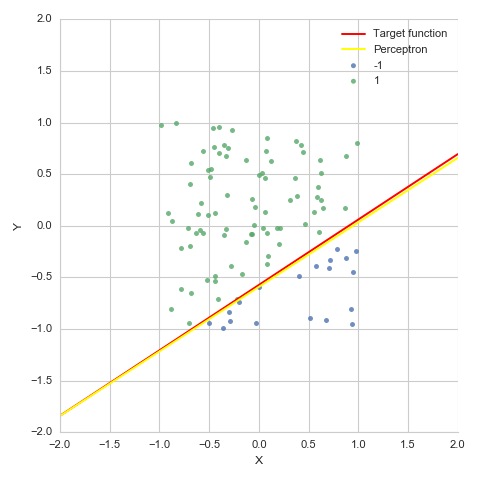

In [54]:
sns.lmplot('X', 'Y', data = sample, hue='Sign', fit_reg=False, legend_out=False, size = 6)
x = np.linspace(-2, 2, 100)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot(x, line_explicit(x), color="red", label="Target function")
plt.plot(x, perceptron_explicit(x), color="yellow", label="Perceptron")
plt.legend()

In [70]:
def run_experiment(sample_size):
    sum_num_it = 0
    eout = 0
    runs = 100
    for i in range(runs):
        sample, line, target_func = generate_sample(sample_size)
        perceptron, num_it = perceptron_algorithm(sample)
        perceptron_sign_func = create_sign_func(perceptron)
        sum_num_it += num_it
        
        # Out of sample error
        out_of_sample_size = 1000
        out_of_sample = pd.DataFrame({
            'X': np.random.uniform(-1, 1, out_of_sample_size),
            'Y': np.random.uniform(-1, 1, out_of_sample_size),
        })

        out_of_sample['Sign'] = out_of_sample[['X', 'Y']].apply(target_func, axis = 1)
        out_of_sample['Perc_sign'] = out_of_sample[['X', 'Y']].apply(perceptron_sign_func, axis = 1)
        eout += out_of_sample[out_of_sample.Sign != out_of_sample.Perc_sign].shape[0] / out_of_sample_size
    
    print("N: ", sample_size)
    print("Avarage number of iterations: ", sum_num_it / runs)
    print("Average out of sample error: ", eout / runs)

### Solutions to questions 7, 8, 9 and 10:

In [71]:
run_experiment(10)

N:  10
Avarage number of iterations:  9.26
Average out of sample error:  0.11276999999999993


In [72]:
run_experiment(100)

N:  100
Avarage number of iterations:  136.88
Average out of sample error:  0.012019999999999998
